# Adversarial Search: Playing Connect 4

Student Name: Rick Lattin

I have used the following AI tools: Github Copilot and ChatGPT3

I understand that my submission needs to be my own work: RL

## Instructions

Total Points: Undegraduates 100, graduate students 110

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

You will implement different versions of agents that play Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

Note that [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution)
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

# *NOTE* I am submitting this section late, as my whole code takes around an hour to run and all of the blocks had not been run in the previous submission, as I could not run them all and still submit my project on time. If you check no code has been changed, but now everything has been run

## Task 1: Defining the Search Problem [10 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model (result function)
* Goal state (terminal state and utility)

### Your code/answer goes here.

##### Initial State: the primary position that the environment appears in before it begins to be searched through.
##### Action: All possible moves that can be made from a given state in the environment
##### Transition Model: How an action changes the environment to move from one state to another state
##### Goal State: The environment state that satisfies the utility desired by the agent


How big is the state space? Give an estimate and explain it.

### Your code/ answer goes here.

#### The maximum that the state space could be for this environment is 3^42. This is due to the fact that there are 42 possible spaces in which a piece could be placed in and 3 possible options for what can occupy these spaces. These options being a red piece, a yellow piece, or no piece. That being said the state space is most likely much smaller than 3^42 as there are some board configurations that are not possible, as the game would end before they could be achieved, such as a row of red pieces completely surrounded by yellow pieces. Furthermore, there are even more states are bot reachable due to the fact that each space that has a piece in it, must be at the bottom of the board or have another piece resting underneath it due to the nature of the game.

How big is the game tree that minimax search will go through? Give an estimate and explain it.

### Your code/ answer goes here.

#### The game tree size will have to be less than 1+(42x41)+(42x41x40) ... +(42!) as this would represent the number of possible spaces that could be occupied on the board. Similar to the previous question, this search would realistically be less than the value mentioned before as it would not have to go through any of the nodes that are impossible to reach in the real game, either through the fact that the game would end before they are reached, or through the fact that they are against the rules of the game.


## Task 2: Game Environment and Random Agent [25 point]

Use a numpy character array as the board.

In [1]:
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


The standard board is $6 \times 7$ but you can use smaller boards to test your code. Instead of colors (red and yellow), I use 1 and -1 to represent the players. Make sure that your agent functions all have the from: `agent_type(board, player = 1)`, where board is the current board position (in the format above) and player is the player whose next move it is and who the agent should play (as 1 and -1).

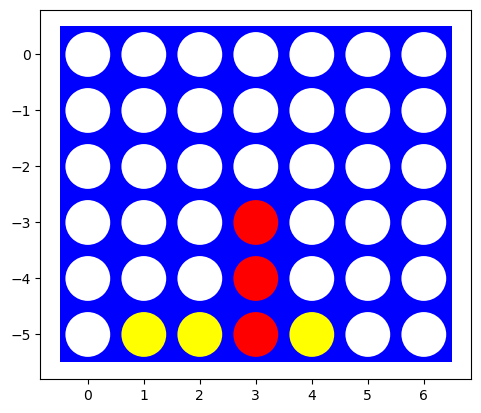

In [2]:
# Visualization code by Randolph Rankin

import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]
visualize(board)

Implement helper functions for:

* A check for available actions in each state `actions(s)`.
* The transition model `result(s, a)`.
* Check for terminal states `terminal(s)`.
* The utility function `utility(s)`.

Make sure that all these functions work with boards of different sizes (number of columns and rows).

In [3]:
# Your code/ answer goes here.

import warnings
warnings.filterwarnings('ignore')

# action function
def action(board_state):
    # initialize the list of column numbers as possible actions
    possible_actions = []

    # check if the top row is empty for every column
    for i in range(board_state.shape[1]):
        # if the top row is empty, add the column number to the list of possible actions
        if board_state[0][i] == 0:
            possible_actions.append(i)
    return possible_actions

# return the new board state after an action is taken
def results(board_state, res_action, player_token):
    # initialize the new board state
    new_board_state = board_state.copy()

    # check every row in the column action
    count_from_bottom = new_board_state.shape[0] - 1
    while count_from_bottom >= 0:
        # if the row is empty, add the player's token
        if new_board_state[count_from_bottom][res_action] == 0:
            new_board_state[count_from_bottom][res_action] = player_token
            break
        count_from_bottom -= 1

    return new_board_state


def check_connect_4(board_state):
    # check rows for connect 4s
    for i in range(board_state.shape[0]):
        for j in range(board_state.shape[1] - 3):
            if board_state[i][j] != 0 and board_state[i][j] == board_state[i][j + 1] == board_state[i][j + 2] == board_state[i][j + 3]:
                if board_state[i][j] == 1:
                    return 1
                if board_state[i][j] == -1:
                    return -1

    # check columns for connect 4s
    for i in range(board_state.shape[0] - 3):
        for j in range(board_state.shape[1]):
            if board_state[i][j] != 0 and board_state[i][j] == board_state[i + 1][j] == board_state[i + 2][j] == board_state[i + 3][j]:
                if board_state[i][j] == 1:
                    return 1
                if board_state[i][j] == -1:
                    return -1

    # check diagonals for connect down and right 4s
    for i in range(board_state.shape[0] - 3):
        for j in range(board_state.shape[1] - 3):
            if board_state[i][j] != 0 and board_state[i][j] == board_state[i + 1][j + 1] == board_state[i + 2][j + 2] == board_state[i + 3][j + 3]:
                if board_state[i][j] == 1:
                    return 1
                if board_state[i][j] == -1:
                    return -1

     # check diagonals for connect up and left 4s
    for i in range(board_state.shape[0] - 3):
        j = board_state.shape[1] - 1
        while j >= 2:
            if board_state[i][j] != 0 and board_state[i][j] == board_state[i + 1][j - 1] == board_state[i + 2][j - 2] == board_state[i + 3][j - 3]:
                if board_state[i][j] == 1:
                    return 1
                if board_state[i][j] == -1:
                    return -1
            j -= 1

    # if no connect 4 is found, return 0
    return 0

def check_connect_3(board_state):
    total_3s = 0
    total_for_plr = 0
    total_for_opp = 0

    # check rows for connect 3s
    for i in range(board_state.shape[0]):
        for j in range(board_state.shape[1] - 2):
            if board_state[i][j] != 0 and board_state[i][j] == board_state[i][j + 1] == board_state[i][j + 2]:
                if board_state[i][j] == 1:
                    total_3s += 1
                    total_for_plr += 1
                if board_state[i][j] == -1:
                    total_3s += 1
                    total_for_opp += 1

    # check columns for connect 3s
    for i in range(board_state.shape[0] - 2):
        for j in range(board_state.shape[1]):
            if board_state[i][j] != 0 and board_state[i][j] == board_state[i + 1][j] == board_state[i + 2][j]:
                if board_state[i][j] == 1:
                    total_3s += 1
                    total_for_plr += 1
                if board_state[i][j] == -1:
                    total_3s += 1
                    total_for_opp += 1

    # check diagonals for connect down and right 3s
    for i in range(board_state.shape[0] - 2):
        for j in range(board_state.shape[1] - 2):
            if board_state[i][j] != 0 and board_state[i][j] == board_state[i + 1][j + 1] == board_state[i + 2][j + 2]:
                if board_state[i][j] == 1:
                    total_3s += 1
                    total_for_plr += 1
                if board_state[i][j] == -1:
                    total_3s += 1
                    total_for_opp += 1

     # check diagonals for connect up and left 3s
    for i in range(board_state.shape[0] - 2):
        j = board_state.shape[0] - 1
        while j >= 0:
            if board_state[i][j] != 0 and board_state[i][j] == board_state[i + 1][j - 1] == board_state[i + 2][j - 2]:
                if board_state[i][j] == 1:
                    total_3s += 1
                    total_for_plr += 1
                if board_state[i][j] == -1:
                    total_3s += 1
                    total_for_opp += 1
            j -= 1

    # if there are no connect 3s, the ratio of connect 3s is 0
    ratio_of_plr = 0
    ratio_of_opp = 0

    # if there are connect 3s, calculate the ratio of connect 3s for each player
    if total_3s > 0:
        ratio_of_plr = total_for_plr / total_3s
        ratio_of_opp = total_for_opp / total_3s

    # if no connect 4 is found, return 0
    return ratio_of_plr, ratio_of_opp

# checks if there are any connect 4s
def terminal(board_state):
    result = 0
    finished = False

    # check if anyone has currently won or if the board is in a nuetral state
    result = check_connect_4(board_state)
    if result != 0:
        finished = True

    # check if the board is full
    if np.count_nonzero(board_state) == board_state.shape[0] * board_state.shape[1]:
        finished = True
        # return 0

    if finished == False:
        return False, 0
    else:
        return True, result

# checks the utility of a board state
def utility(board_state, player):
    # check if anyone has currently won or if the board is in a nuetral state
    # result = terminal(board_state)

    # check if board is in a terminal state
    is_terminal, result = terminal(board_state)
    if is_terminal:
        return result

    utility = 0

    return utility


Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = 1): ...`

The argument `player` is used for agents that do not store what color they are playing. The value passed on by the environment should be 1 ot -1 for player red and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [9]:
# Your code/ answer goes here.
def random_player(board_state, player = 1):
    # return random choice from the list of possible actions
    rand_action = np.random.choice(action(board_state))
    return results(board_state, rand_action, player)

Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

In [8]:
# Your code/ answer goes here.
import pandas as pd

def play(board, player1, player2, cutoff = None): #pass in function for both players
    turn = 0
    cur_board = board.copy()

    # play until the someone wins or the board is full
    is_terminal, result = terminal(cur_board)

    while is_terminal == False:

        # does turns for cutoff ab minmax search
        if cutoff != None:
            if turn % 2 == 0:
                cur_board = player1(cur_board, 1, cutoff)
            else:
                cur_board = player2(cur_board, -1, cutoff)
            turn += 1
        # does turns for other search types
        else:
            if turn % 2 == 0:
                cur_board = player1(cur_board, 1)
            else:
                cur_board = player2(cur_board, -1)
            turn += 1
        
        

        # check if the board is in a terminal state
        is_terminal, result = terminal(cur_board)

    # return the final board state
    return cur_board


df = pd.DataFrame(columns=['run_number', 'winner'])

for x in range(1000):
    myBoard = empty_board()
    myBoard = play(myBoard, random_player, random_player)
    # visualize(myBoard)
    # print("The board ended with a utility of", utility(myBoard, 1))
    df = df.append({'run_number': x, 'winner': utility(myBoard, 1)}, ignore_index=True)

NameError: name 'random_player' is not defined

In [6]:
# print the number of times each player won
print("Number of times each player won:")
print(df['winner'].value_counts())

Number of times each player won:
 1    529
-1    468
 0      3
Name: winner, dtype: int64


## Task 3: Minimax Search with Alpha-Beta Pruning

### Implement the Search [20 points]

Implement minimax search starting from a given board for specifying the player.
You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).

__Important Notes:__
* Make sure that all your agent functions have a signature consistent with the random agent above and that it [uses a class to store state information.](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb)
This is essential to be able play against agents from other students later.
* The search space for a $6 \times 7$ board is large. You can experiment with smaller boards (the smallest is $4 \times 4$) and/or changing the winning rule to connect 3 instead of 4.

In [7]:
import math

def alpha_beta_minmax_search(board, player = 1, depth = +math.inf, ):
    global DEBUG, COUNT
    COUNT, DEBUG = 0, 0
    COUNT += 1
    plr = player

    # checks each possible column for a move to see if there is terminal state in any 
    for a in action(board):
        is_terminal, result = terminal(results(board, a, plr))
        if is_terminal and result == plr:
            return a

    utility, next_move = max_val_ab(board, plr, -math.inf, +math.inf)
    if DEBUG >= 1: print(f"Nodes searched: {COUNT}")
    return next_move

# players best move
def max_val_ab(state, player, alpha, beta):
    #initialize global variables
    global DEBUG, COUNT
    COUNT += 1

    # returns utility and next move as none if it is at a terminal state
    v = utility(state, player)
    if DEBUG >= 2: print(f"max: {state} [alpha,beta]=[{alpha},{beta}] v={v}")
    is_terminal, term_result = terminal(state)
    if is_terminal:
        if DEBUG >= 2: print(f"     found terminal state. backtracking.")
        return v, None
    

    v, move = -math.inf, None

    # check all possible actions in the state, return move with the largest value
    for a in action(state):
        v2, a2 = min_val_ab(results(state, a, player), player, alpha, beta)
        if DEBUG >= 2: print(f"max: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")
        if v2 > v:
            v, move = v2, a
            alpha = max(alpha, v)
        if v >= beta:
            if DEBUG >= 2: print(f"     v>=beta ({v}>={beta}): pruning remaining subtree (actions). backtracking.")
            return v, move

    # print("max", v, move)
    return v, move


def min_val_ab(state, player, alpha, beta):
    #initialize global variables
    global DEBUG, COUNT
    COUNT += 1

    # returns utility and next move as none if it is at a terminal state
    v = utility(state, player)
    if DEBUG >= 2: print(f"min: {state} [alpha,beta]=[{alpha},{beta}] v={v}")
    is_terminal, term_result = terminal(state)
    if is_terminal:
        if DEBUG >= 2: print(f"     found terminal state. backtracking.")
        return v, None

    v, move = +math.inf, None

    # check all possible actions in the state, return move with the smallest value
    for a in action(state):
        v2, a2 = max_val_ab(results(state, a, (player * -1)), player, alpha, beta)
        if DEBUG >= 2: print(f"min: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")

        if v2 < v:
            v, move = v2, a
            beta = min(beta, v)
        if v <= alpha:
            if DEBUG >= 2: print(f"     v<=alpha ({v}>={alpha}): pruning remaining subtree (actions). backtracking.")
            return v, move
    
    # print("min", v, move)
    return v, move


def ab_minmax_player(board, player = 1):
    global DEBUG

    move = alpha_beta_minmax_search(board, player)
    # for output board for debugging
    if DEBUG >= 0.5: visualize(results(board, move, player))

    return results(board, move, player)


Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

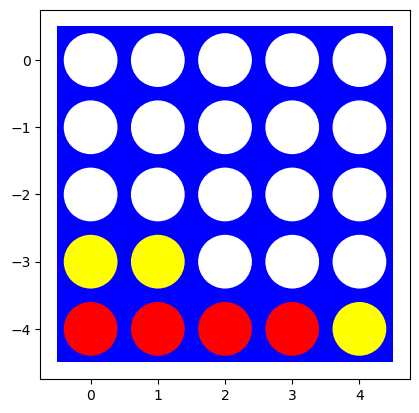

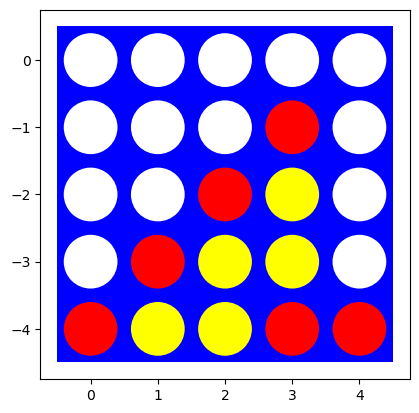

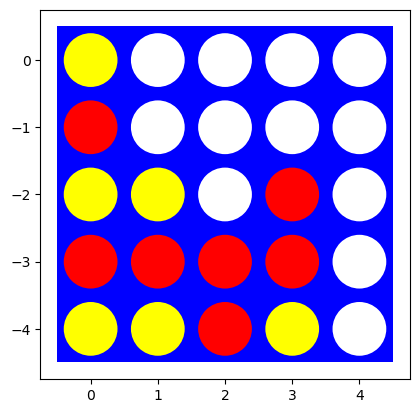

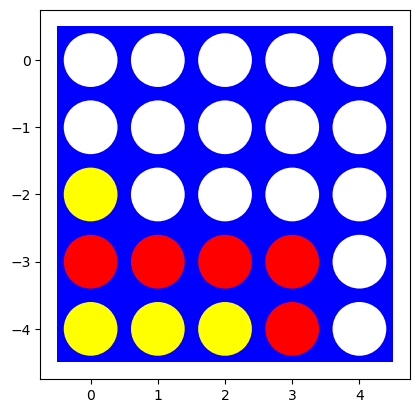

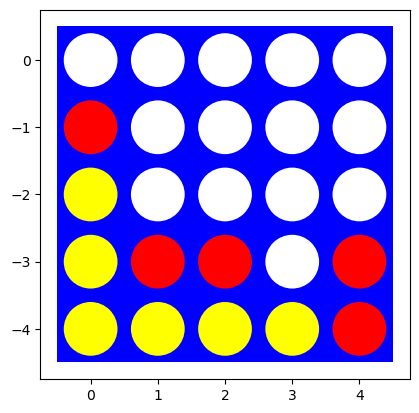

In [9]:
# Your code/ answer goes here.

# five testing boards
board1 = [[0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0], 
          [0, 0, 0, 0, 0],
          [-1, -1, 0, 0, 0],
          [1, 1, 0, 1, -1]]

board2 = [[0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0], 
            [0, 0, 1, -1, 0],
            [0, 1, -1, -1, 0],
            [1, -1, -1, 1, 1]]

board3 = [[0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0], 
            [0, 0, 0, 1, 0],
            [0, 0, 0, 1, 0],
            [-1, -1, 1, -1, 0]]

board4 = [[0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0], 
            [0, 0, 0, 0, 0],
            [1, 1, 1, 0, 0],
            [-1, -1, -1, 0, 0]]


board5 = [[0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0], 
            [-1, 0, 0, 0, 0],
            [-1, 1, 1, 0, 1],
            [-1, -1, -1, 0, 1]]


# change name of board that is assigned to board variable to test different boards
board = np.array(board1)
board = play(board, ab_minmax_player, ab_minmax_player)
visualize(board)

board = np.array(board2)
board = play(board, ab_minmax_player, ab_minmax_player)
visualize(board)

board = np.array(board3)
board = play(board, ab_minmax_player, ab_minmax_player)
visualize(board)

board = np.array(board4)
board = play(board, ab_minmax_player, ab_minmax_player)
visualize(board)

board = np.array(board5)
board = play(board, ab_minmax_player, ab_minmax_player)
visualize(board)

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

### This block was run for column sizes only going up to 5 columns. Attempting to run the minmax search with an empty board with 6-7 columns would take an unrealistic amount of time.

In [8]:
# Your code/ answer goes here.
import pandas as pd
import time

# dataframe to store time results
df = pd.DataFrame(columns=['board_shape', 'time_taken_ab_minmax'])

# run the minmax search for increasing board shapes
for x in range(2):
    shape = (3,4+x)
    print(shape)
    board = empty_board(shape)
    board = np.array(board)

    # time how long the minmax search takes and save the time to a dataframe
    start = time.time()
    next_move = ab_minmax_player(board, 1)
    end = time.time()

    df = df.append({'board_shape': shape, 'time_taken_ab_minmax': end - start}, ignore_index=True)

print(df)

(3, 4)
(3, 5)
  board_shape  time_taken_ab_minmax
0      (3, 4)              0.085730
1      (3, 5)              6.063467


### Move ordering [5 points]

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

In [9]:
# Your code/ answer goes here.

def action(board):
    possible_actions = []

    # check if the top row is empty for every column
    for i in range(board.shape[1]):
        # if the top row is empty, add the column number to the list of possible actions
        if board[0][i] == 0:
            possible_actions.append(i)

    priority = [0, 1, 1, 2, 1, 1, 0]

    # order the actions by priority
    priority_actions = []
    
    actions = [a for _,a in sorted(zip(priority,possible_actions), reverse=True)]
    # print(actions)

    return actions


board = empty_board()
action(board)

[3, 5, 4, 2, 1, 6, 0]

### The first few moves [5 points]

Start with an empty board. This is the worst case scenario for minimax search since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do?

#### You could create a method of stopping the search algorithm after a certain time has passed within the ab_minmax_search function

In [12]:
# Your code/ answer goes here.

# shape = (6,7)
# board = empty_board(shape)
# board = play(board, ab_minmax_player, ab_minmax_player)
# visualize(board)

### Playtime [5 points]

Let the Minimax Search agent play a random agent on a small board. Analyze wins, losses and draws.

In [10]:
# Your code/ answer goes here.

# create a dataframe to store the results of the games
df = pd.DataFrame(columns=['board_shape', 'winner'])

shape = (4,4)
board = empty_board(shape)
for x in range(20):
    final_board = play(board, ab_minmax_player, random_player)
    winner = utility(final_board, 1)
    df = df.append({'board_shape': shape, 'winner': winner}, ignore_index=True)

   board_shape winner
0       (4, 4)      1
1       (4, 4)      1
2       (4, 4)      1
3       (4, 4)      1
4       (4, 4)      0
5       (4, 4)      1
6       (4, 4)      1
7       (4, 4)      1
8       (4, 4)      1
9       (4, 4)      1
10      (4, 4)      1
11      (4, 4)      1
12      (4, 4)      1
13      (4, 4)      1
14      (4, 4)      0
15      (4, 4)      1
16      (4, 4)      0
17      (4, 4)      0
18      (4, 4)      1
19      (4, 4)      1


<AxesSubplot:>

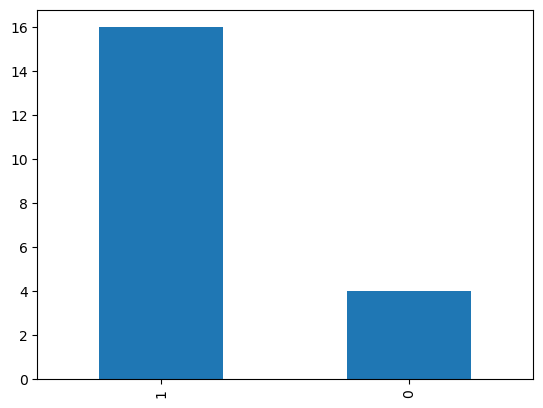

In [11]:
print(df)

# create a bar graph to show the results of the games
df['winner'].value_counts().plot(kind='bar')


## Task 4: Heuristic Alpha-Beta Tree Search

### Heuristic evaluation function [15 points]

Define and implement a heuristic evaluation function.

In [12]:
# Your code/ answer goes here.

# checks the utility of a board state
def hueristic(board_state, player):
    # check if board is in a terminal state
    is_terminal, result = terminal(board_state)
    if is_terminal:
        return result, is_terminal

    # check if there are any connect 3s for the utility function
    huer_val = 0
    plr_ratio, opp_ratio = check_connect_3(board_state)
    if player == 1:
       huer_val = plr_ratio - opp_ratio
    else:
        huer_val = opp_ratio - plr_ratio

    # prevents a connect 3 from being worth the same as a connect 4
    if(abs(huer_val) == 1):
        huer_val = 0.9 * huer_val

    return huer_val, is_terminal

(0, False)


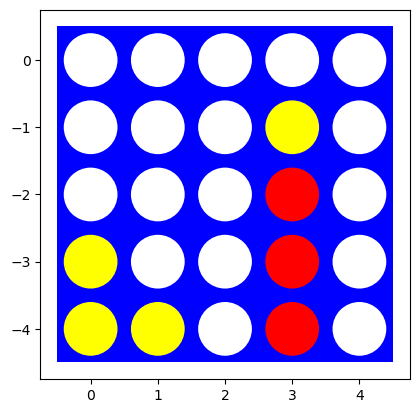

(0.9, False)


In [13]:
shape = (6,7)
board = empty_board(shape)
util_val = hueristic(board, 1)
print(util_val)

board3 = [[0, 0, 0, 0, 0],
            [0, 0, 0, -1, 0], 
            [0, 0, 0, 1, 0],
            [-1, 0, 0, 1, 0],
            [-1, -1, 0, 1, 0]]
board = np.array(board3)
visualize(board)
util_val = hueristic(board, 1)
print(util_val)

### Cutting off search [10 points]

Modify your Minimax Search with Alpha-Beta Pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [14]:
# Your code/ answer goes here.

import math

def cutoff_minmax_search(board, player = 1, cutoff = None):
    global DEBUG, COUNT
    COUNT, DEBUG = 0, 0
    COUNT += 1
    plr = player

    # checks each possible column for a move to see if there is terminal state in any 
    for a in action(board):
        is_terminal, result = terminal(results(board, a, plr))
        if is_terminal and result == plr:
            return a

    h_value, next_move = max_val_cut(board, plr, -math.inf, +math.inf, 0, cutoff)
    if DEBUG >= 1: print(f"Nodes searched: {COUNT}")
    return next_move

# players best move
def max_val_cut(state, player, alpha, beta, depth, cutoff):
    #initialize global variables
    global DEBUG, COUNT
    COUNT += 1

    # returns utility and next move as none if it is at a terminal state
    v, is_terminal = hueristic(state, player)
    if DEBUG >= 2: print(f"max: {state} [alpha,beta]=[{alpha},{beta}] v={v}")
    if (cutoff is not None and depth >= cutoff) or is_terminal:
        if is_terminal:
            alpha, beta = v, v
        if DEBUG >= 2: print(f"     found terminal state. backtracking.")
        return v, None
    

    v, move = -math.inf, None

    # check all possible actions in the state, return move with the largest value
    for a in action(state):
        v2, a2 = min_val_cut(results(state, a, player), player, alpha, beta, depth + 1, cutoff)
        if DEBUG >= 2: print(f"max: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")
        if v2 > v:
            v, move = v2, a
            alpha = max(alpha, v)
        if v >= beta:
            if DEBUG >= 2: print(f"     v>=beta ({v}>={beta}): pruning remaining subtree (actions). backtracking.")
            return v, move

    # print("max", v, move)
    return v, move


def min_val_cut(state, player, alpha, beta, depth, cutoff):
    #initialize global variables
    global DEBUG, COUNT
    COUNT += 1

    # returns hueristic utility and next move as none if it is at a terminal state
    v, is_terminal = hueristic(state, player)
    if DEBUG >= 2: print(f"min: {state} [alpha,beta]=[{alpha},{beta}] v={v}")
    if (cutoff is not None and depth >= cutoff) or is_terminal:
        if is_terminal:
            alpha, beta = v, v
        if DEBUG >= 2: print(f"     found terminal state. backtracking.")
        return v, None

    v, move = +math.inf, None

    # check all possible actions in the state, return move with the smallest value
    for a in action(state):
        v2, a2 = max_val_cut(results(state, a, (player * -1)), player, alpha, beta, depth + 1, cutoff)
        if DEBUG >= 2: print(f"min: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")

        if v2 < v:
            v, move = v2, a
            beta = min(beta, v)
        if v <= alpha:
            if DEBUG >= 2: print(f"     v<=alpha ({v}>={alpha}): pruning remaining subtree (actions). backtracking.")
            return v, move
    
    # print("min", v, move)
    return v, move


def cutoff_minmax_player_100(board, player = 1, cutoff = 100):
    global DEBUG

    move = cutoff_minmax_search(board, player, cutoff)
    # for output board for debugging
    if DEBUG >= 0.5: visualize(results(board, move, player))

    return results(board, move, player)

Experiment with the same manually created boards as above to check if the agent spots wining opportunities.

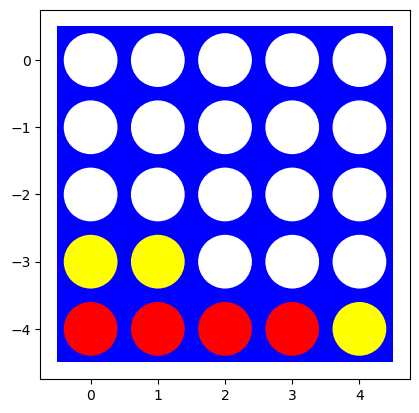

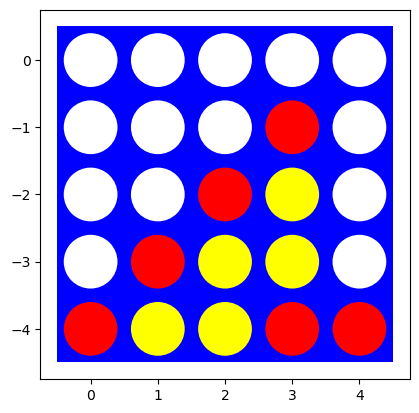

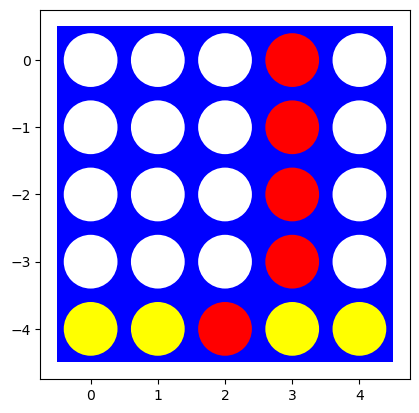

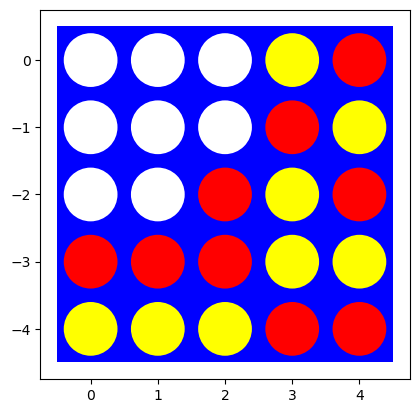

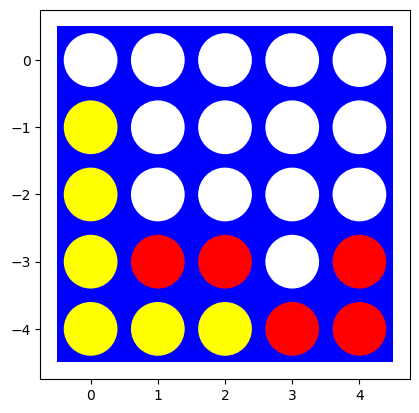

In [18]:
# Your code/ answer goes here.

# five testing boards
board1 = [[0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0], 
          [0, 0, 0, 0, 0],
          [-1, -1, 0, 0, 0],
          [1, 1, 0, 1, -1]]

board2 = [[0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0], 
            [0, 0, 1, -1, 0],
            [0, 1, -1, -1, 0],
            [1, -1, -1, 1, 1]]

board3 = [[0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0], 
            [0, 0, 0, 1, 0],
            [0, 0, 0, 1, 0],
            [-1, -1, 1, -1, 0]]

board4 = [[0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0], 
            [0, 0, 0, 0, 0],
            [1, 1, 1, 0, 0],
            [-1, -1, -1, 0, 0]]


board5 = [[0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0], 
            [-1, 0, 0, 0, 0],
            [-1, 1, 1, 0, 1],
            [-1, -1, -1, 0, 1]]


# change name of board that is assigned to board variable to test different boards
board = np.array(board1)
board = play(board, cutoff_minmax_player_100, cutoff_minmax_player_100, 100)
visualize(board)

board = np.array(board2)
board = play(board, cutoff_minmax_player_100, cutoff_minmax_player_100, 100)
visualize(board)

board = np.array(board3)
board = play(board, cutoff_minmax_player_100, cutoff_minmax_player_100, 100)
visualize(board)

board = np.array(board4)
board = play(board, cutoff_minmax_player_100, cutoff_minmax_player_100, 100)
visualize(board)

board = np.array(board5)
board = play(board, cutoff_minmax_player_100, cutoff_minmax_player_100, 100)
visualize(board)

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

### This block was run for column sizes only going up to 5 columns. Attempting to run the cutoff minmax search with an empty board with 6-7 columns would take an unrealistic amount of time.

In [15]:
# Your code/ answer goes here.
import time

# dataframe to store time results
df = pd.DataFrame(columns=['board_shape', 'time_taken_cutoff_minmax'])

# run the minmax search for increasing board shapes
for x in range(2):
    shape = (3,4+x)
    print(shape)
    board = empty_board(shape)
    board = np.array(board)

    # time how long the minmax search takes and save the time to a dataframe
    start = time.time()
    next_move = cutoff_minmax_player_100(board, 1)
    end = time.time()

    df = df.append({'board_shape': shape, 'time_taken_ab_minmax': end - start}, ignore_index=True)

print(df)

(3, 4)
(3, 5)
  board_shape time_taken_cutoff_minmax  time_taken_ab_minmax
0      (3, 4)                      NaN              0.107296
1      (3, 5)                      NaN              3.552694


### Playtime [5 points]

Let two heuristic search agents (different cutoff depth, different heuristic evaluation function) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

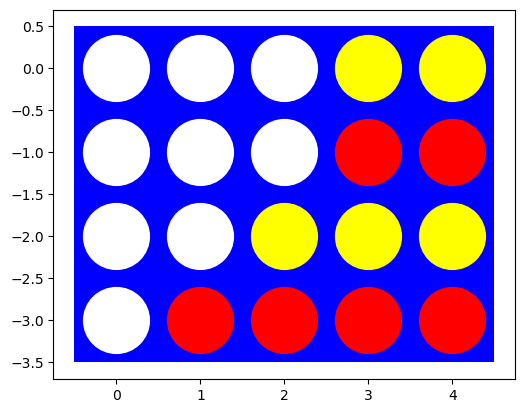

In [20]:
# Your code/ answer goes here.
shape = (4,5)
board = empty_board(shape)
board = play(board, cutoff_minmax_player_100, ab_minmax_player)
visualize(board)

## Challenge task [+ 10 bonus point will be awarded separately]

Find another student and let your best agent play against the other student's best player. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [10 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+10 bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search and investigate how this search performs on the test boards that you have used above.

In [16]:
# Your code/ answer goes here.
def playout(board, in_action, player = 1):
    board = results(board, in_action, player)

    # switch players
    current_player = player * -1

    while(True):
        is_terminal, result = terminal(board)
        if is_terminal:
            return result
        fin_action = np.random.choice(action(board))
        board = results(board, fin_action, current_player)

        # switch players
        current_player = current_player * -1

In [17]:
def run_playouts(board, in_action, player = 1, N = 100):
    all_playouts = [playout(board, in_action, player) for x in range(N)]
    
    print("Percentage of Wins for Player:", sum(np.array(all_playouts) == +1)/len(all_playouts))
    print("Percentage of Losses for Player:", sum(np.array(all_playouts) == -1)/len(all_playouts))
    print("Percentage of Draws:", sum(np.array(all_playouts) == 0)/len(all_playouts))

    return all_playouts

In [18]:
def pure_monte_carlo_search(board, player = 1, N = 100):
    
    possible_actions = action(board)
    n = math.floor(N/len(possible_actions))
    if DEBUG >= 1: print(f"Actions: {acts} ({N} total playouts = {n} playouts per action)")

    ps = { i : np.mean(run_playouts(board, i, player, N=n)) for i in possible_actions }
    if DEBUG >= 1: print(f"Action values: {ps}")

    fin_action = max(ps, key=ps.get)
    return fin_action

def monte_carlo_player(board, player = 1, N = 100):
    global DEBUG

    move = pure_monte_carlo_search(board, player, N)
    # for output board for debugging
    if DEBUG >= 0.5: visualize(results(board, move, player))

    return results(board, move, player)

Percentage of Wins for Player: 0.722
Percentage of Losses for Player: 0.2185
Percentage of Draws: 0.0595
Percentage of Wins for Player: 0.666
Percentage of Losses for Player: 0.298
Percentage of Draws: 0.036
Percentage of Wins for Player: 1.0
Percentage of Losses for Player: 0.0
Percentage of Draws: 0.0
Percentage of Wins for Player: 0.7105
Percentage of Losses for Player: 0.232
Percentage of Draws: 0.0575
Percentage of Wins for Player: 0.6355
Percentage of Losses for Player: 0.3185
Percentage of Draws: 0.046


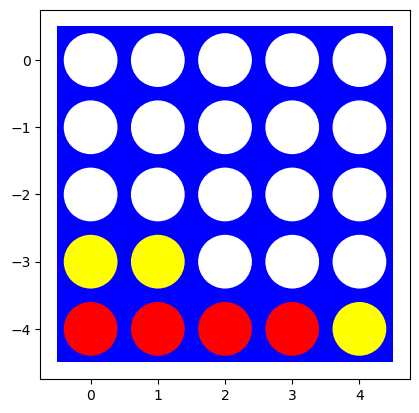

Percentage of Wins for Player: 1.0
Percentage of Losses for Player: 0.0
Percentage of Draws: 0.0
Percentage of Wins for Player: 0.532
Percentage of Losses for Player: 0.4215
Percentage of Draws: 0.0465
Percentage of Wins for Player: 0.5755
Percentage of Losses for Player: 0.365
Percentage of Draws: 0.0595
Percentage of Wins for Player: 0.5945
Percentage of Losses for Player: 0.367
Percentage of Draws: 0.0385
Percentage of Wins for Player: 0.5795
Percentage of Losses for Player: 0.3745
Percentage of Draws: 0.046


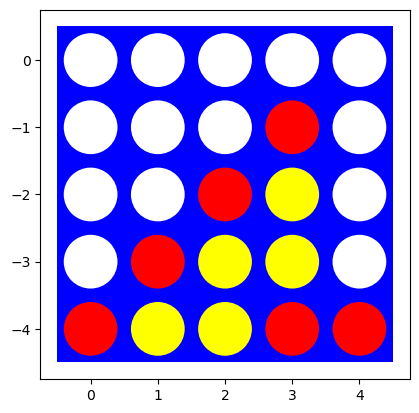

Percentage of Wins for Player: 0.7795
Percentage of Losses for Player: 0.1445
Percentage of Draws: 0.076
Percentage of Wins for Player: 0.6305
Percentage of Losses for Player: 0.304
Percentage of Draws: 0.0655
Percentage of Wins for Player: 0.685
Percentage of Losses for Player: 0.256
Percentage of Draws: 0.059
Percentage of Wins for Player: 0.7485
Percentage of Losses for Player: 0.183
Percentage of Draws: 0.0685
Percentage of Wins for Player: 0.668
Percentage of Losses for Player: 0.2775
Percentage of Draws: 0.0545
Percentage of Wins for Player: 0.627
Percentage of Losses for Player: 0.243
Percentage of Draws: 0.13
Percentage of Wins for Player: 0.8785
Percentage of Losses for Player: 0.074
Percentage of Draws: 0.0475
Percentage of Wins for Player: 0.828
Percentage of Losses for Player: 0.1395
Percentage of Draws: 0.0325
Percentage of Wins for Player: 0.8065
Percentage of Losses for Player: 0.108
Percentage of Draws: 0.0855
Percentage of Wins for Player: 0.766
Percentage of Losses fo

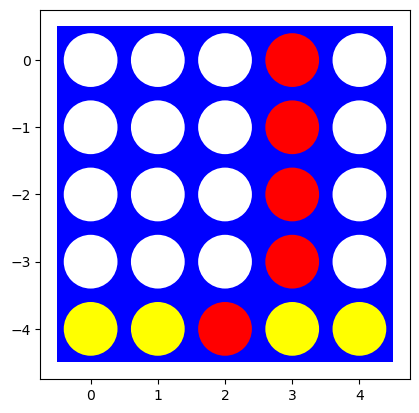

Percentage of Wins for Player: 0.8065
Percentage of Losses for Player: 0.1105
Percentage of Draws: 0.083
Percentage of Wins for Player: 0.371
Percentage of Losses for Player: 0.574
Percentage of Draws: 0.055
Percentage of Wins for Player: 0.381
Percentage of Losses for Player: 0.5675
Percentage of Draws: 0.0515
Percentage of Wins for Player: 0.463
Percentage of Losses for Player: 0.529
Percentage of Draws: 0.008
Percentage of Wins for Player: 0.3565
Percentage of Losses for Player: 0.602
Percentage of Draws: 0.0415
Percentage of Wins for Player: 0.694
Percentage of Losses for Player: 0.1805
Percentage of Draws: 0.1255
Percentage of Wins for Player: 0.8795
Percentage of Losses for Player: 0.0795
Percentage of Draws: 0.041
Percentage of Wins for Player: 0.8265
Percentage of Losses for Player: 0.118
Percentage of Draws: 0.0555
Percentage of Wins for Player: 0.781
Percentage of Losses for Player: 0.094
Percentage of Draws: 0.125
Percentage of Wins for Player: 0.889
Percentage of Losses for

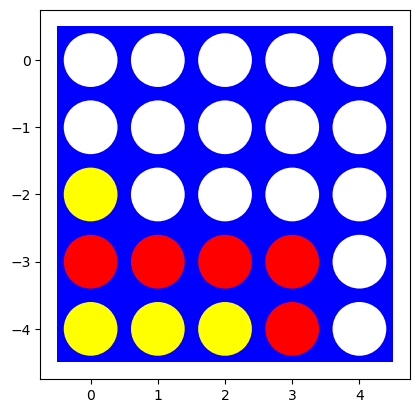

Percentage of Wins for Player: 0.49
Percentage of Losses for Player: 0.474
Percentage of Draws: 0.036
Percentage of Wins for Player: 0.2515
Percentage of Losses for Player: 0.741
Percentage of Draws: 0.0075
Percentage of Wins for Player: 0.1785
Percentage of Losses for Player: 0.808
Percentage of Draws: 0.0135
Percentage of Wins for Player: 0.2185
Percentage of Losses for Player: 0.7815
Percentage of Draws: 0.0
Percentage of Wins for Player: 0.4155
Percentage of Losses for Player: 0.561
Percentage of Draws: 0.0235
Percentage of Wins for Player: 0.448
Percentage of Losses for Player: 0.4945
Percentage of Draws: 0.0575
Percentage of Wins for Player: 0.6615
Percentage of Losses for Player: 0.3005
Percentage of Draws: 0.038
Percentage of Wins for Player: 0.701
Percentage of Losses for Player: 0.2865
Percentage of Draws: 0.0125
Percentage of Wins for Player: 0.6235
Percentage of Losses for Player: 0.337
Percentage of Draws: 0.0395
Percentage of Wins for Player: 0.0
Percentage of Losses for 

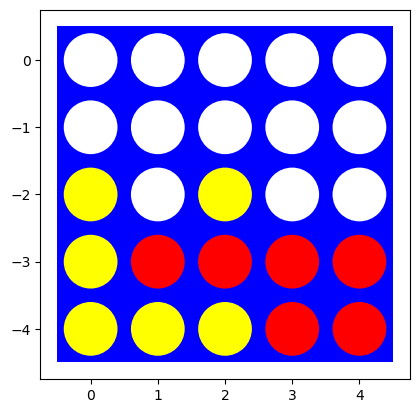

In [24]:
# Your code/ answer goes here.

# five testing boards
board1 = [[0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0], 
          [0, 0, 0, 0, 0],
          [-1, -1, 0, 0, 0],
          [1, 1, 0, 1, -1]]

board2 = [[0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0], 
            [0, 0, 1, -1, 0],
            [0, 1, -1, -1, 0],
            [1, -1, -1, 1, 1]]

board3 = [[0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0], 
            [0, 0, 0, 1, 0],
            [0, 0, 0, 1, 0],
            [-1, -1, 1, -1, 0]]

board4 = [[0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0], 
            [0, 0, 0, 0, 0],
            [1, 1, 1, 0, 0],
            [-1, -1, -1, 0, 0]]


board5 = [[0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0], 
            [-1, 0, 0, 0, 0],
            [-1, 1, 1, 0, 1],
            [-1, -1, -1, 0, 1]]


# change name of board that is assigned to board variable to test different boards
board = np.array(board1)
board = play(board, monte_carlo_player, monte_carlo_player, 10000)
visualize(board)

board = np.array(board2)
board = play(board, monte_carlo_player, monte_carlo_player, 10000)
visualize(board)

board = np.array(board3)
board = play(board, monte_carlo_player, monte_carlo_player, 10000)
visualize(board)

board = np.array(board4)
board = play(board, monte_carlo_player, monte_carlo_player, 10000)
visualize(board)

board = np.array(board5)
board = play(board, monte_carlo_player, monte_carlo_player, 10000)
visualize(board)

### Best First Move

Use Oure Monte Carlo Search to determine what the best first move is? Describe under what assumptions this is the "best" first move.  

In [25]:
# Your code/ answer goes here.
shape = (6,7)
board = empty_board(shape)
mc_action = pure_monte_carlo_search(board, 1, 100000)
print("The best first action for Connect 4 is:", mc_action)


Percentage of Wins for Player: 0.6443122156107806
Percentage of Losses for Player: 0.3540777038851943
Percentage of Draws: 0.0016100805040252012
Percentage of Wins for Player: 0.543717185859293
Percentage of Losses for Player: 0.45432271613580677
Percentage of Draws: 0.001960098004900245
Percentage of Wins for Player: 0.5756387819390969
Percentage of Losses for Player: 0.4223311165558278
Percentage of Draws: 0.0020301015050752536
Percentage of Wins for Player: 0.5696884844242213
Percentage of Losses for Player: 0.42821141057052853
Percentage of Draws: 0.0021001050052502626
Percentage of Wins for Player: 0.5470773538676934
Percentage of Losses for Player: 0.4511725586279314
Percentage of Draws: 0.0017500875043752187
Percentage of Wins for Player: 0.5235561778088904
Percentage of Losses for Player: 0.4744137206860343
Percentage of Draws: 0.0020301015050752536
Percentage of Wins for Player: 0.5173258662933147
Percentage of Losses for Player: 0.4807840392019601
Percentage of Draws: 0.00189

In [3]:
import math

class cutoff_search_class:
    def __init__(self, class_board, class_cutoff = None):
        self.class_board = class_board
        self.class_cutoff = class_cutoff

    def action(self, board):
        possible_actions = []

        # check if the top row is empty for every column
        for i in range(board.shape[1]):
            # if the top row is empty, add the column number to the list of possible actions
            if board[0][i] == 0:
                possible_actions.append(i)

        priority = [0, 1, 1, 2, 1, 1, 0]

        # order the actions by priority
        priority_actions = []
        
        actions = [a for _,a in sorted(zip(priority,possible_actions), reverse=True)]
        # print(actions)

        return actions

    # return the new board state after an action is taken
    def results(self, board_state, res_action, player_token):
        # initialize the new board state
        new_board_state = board_state.copy()

        # check every row in the column action
        count_from_bottom = new_board_state.shape[0] - 1
        while count_from_bottom >= 0:
            # if the row is empty, add the player's token
            if new_board_state[count_from_bottom][res_action] == 0:
                new_board_state[count_from_bottom][res_action] = player_token
                break
            count_from_bottom -= 1

        return new_board_state


    def check_connect_4(self, board_state):
        # check rows for connect 4s
        for i in range(board_state.shape[0]):
            for j in range(board_state.shape[1] - 3):
                if board_state[i][j] != 0 and board_state[i][j] == board_state[i][j + 1] == board_state[i][j + 2] == board_state[i][j + 3]:
                    if board_state[i][j] == 1:
                        return 1
                    if board_state[i][j] == -1:
                        return -1

        # check columns for connect 4s
        for i in range(board_state.shape[0] - 3):
            for j in range(board_state.shape[1]):
                if board_state[i][j] != 0 and board_state[i][j] == board_state[i + 1][j] == board_state[i + 2][j] == board_state[i + 3][j]:
                    if board_state[i][j] == 1:
                        return 1
                    if board_state[i][j] == -1:
                        return -1

        # check diagonals for connect down and right 4s
        for i in range(board_state.shape[0] - 3):
            for j in range(board_state.shape[1] - 3):
                if board_state[i][j] != 0 and board_state[i][j] == board_state[i + 1][j + 1] == board_state[i + 2][j + 2] == board_state[i + 3][j + 3]:
                    if board_state[i][j] == 1:
                        return 1
                    if board_state[i][j] == -1:
                        return -1

        # check diagonals for connect up and left 4s
        for i in range(board_state.shape[0] - 3):
            j = board_state.shape[1] - 1
            while j >= 2:
                if board_state[i][j] != 0 and board_state[i][j] == board_state[i + 1][j - 1] == board_state[i + 2][j - 2] == board_state[i + 3][j - 3]:
                    if board_state[i][j] == 1:
                        return 1
                    if board_state[i][j] == -1:
                        return -1
                j -= 1

        # if no connect 4 is found, return 0
        return 0

    def check_connect_3(self, board_state):
        total_3s = 0
        total_for_plr = 0
        total_for_opp = 0

        # check rows for connect 3s
        for i in range(board_state.shape[0]):
            for j in range(board_state.shape[1] - 2):
                if board_state[i][j] != 0 and board_state[i][j] == board_state[i][j + 1] == board_state[i][j + 2]:
                    if board_state[i][j] == 1:
                        total_3s += 1
                        total_for_plr += 1
                    if board_state[i][j] == -1:
                        total_3s += 1
                        total_for_opp += 1

        # check columns for connect 3s
        for i in range(board_state.shape[0] - 2):
            for j in range(board_state.shape[1]):
                if board_state[i][j] != 0 and board_state[i][j] == board_state[i + 1][j] == board_state[i + 2][j]:
                    if board_state[i][j] == 1:
                        total_3s += 1
                        total_for_plr += 1
                    if board_state[i][j] == -1:
                        total_3s += 1
                        total_for_opp += 1

        # check diagonals for connect down and right 3s
        for i in range(board_state.shape[0] - 2):
            for j in range(board_state.shape[1] - 2):
                if board_state[i][j] != 0 and board_state[i][j] == board_state[i + 1][j + 1] == board_state[i + 2][j + 2]:
                    if board_state[i][j] == 1:
                        total_3s += 1
                        total_for_plr += 1
                    if board_state[i][j] == -1:
                        total_3s += 1
                        total_for_opp += 1

        # check diagonals for connect up and left 3s
        for i in range(board_state.shape[0] - 2):
            j = board_state.shape[0] - 1
            while j >= 0:
                if board_state[i][j] != 0 and board_state[i][j] == board_state[i + 1][j - 1] == board_state[i + 2][j - 2]:
                    if board_state[i][j] == 1:
                        total_3s += 1
                        total_for_plr += 1
                    if board_state[i][j] == -1:
                        total_3s += 1
                        total_for_opp += 1
                j -= 1

        # if there are no connect 3s, the ratio of connect 3s is 0
        ratio_of_plr = 0
        ratio_of_opp = 0

        # if there are connect 3s, calculate the ratio of connect 3s for each player
        if total_3s > 0:
            ratio_of_plr = total_for_plr / total_3s
            ratio_of_opp = total_for_opp / total_3s

        # if no connect 4 is found, return 0
        return ratio_of_plr, ratio_of_opp

    # checks if there are any connect 4s
    def terminal(self, board_state):
        result = 0
        finished = False

        # check if anyone has currently won or if the board is in a nuetral state
        result = self.check_connect_4(board_state)
        if result != 0:
            finished = True

        # check if the board is full
        if np.count_nonzero(board_state) == board_state.shape[0] * board_state.shape[1]:
            finished = True
            # return 0

        if finished == False:
            return False, 0
        else:
            return True, result

    # checks the utility of a board state
    def utility(self, board_state, player):
        # check if anyone has currently won or if the board is in a nuetral state
        # result = terminal(board_state)

        # check if board is in a terminal state
        is_terminal, result = self.terminal(board_state)
        if is_terminal:
            return result

        utility = 0

        return utility

    def play(self, board, player1, player2, cutoff = None): #pass in function for both players
        turn = 0
        cur_board = board.copy()

        # play until the someone wins or the board is full
        is_terminal, result = self.terminal(cur_board)

        while is_terminal == False:

            # does turns for cutoff ab minmax search
            if cutoff != None:
                if turn % 2 == 0:
                    cur_board = player1(cur_board, 1, cutoff)
                else:
                    cur_board = player2(cur_board, -1, cutoff)
                turn += 1
            # does turns for other search types
            else:
                if turn % 2 == 0:
                    cur_board = player1(cur_board, 1)
                else:
                    cur_board = player2(cur_board, -1)
                turn += 1
            
            # check if the board is in a terminal state
            is_terminal, result = self.terminal(cur_board)

        # return the final board state
        return cur_board

    def hueristic(self, board_state, player):
        # check if board is in a terminal state
        is_terminal, result = self.terminal(board_state)
        if is_terminal:
            return result, is_terminal

        # check if there are any connect 3s for the utility function
        huer_val = 0
        plr_ratio, opp_ratio = self.check_connect_3(board_state)
        if player == 1:
            huer_val = plr_ratio - opp_ratio
        else:
            huer_val = opp_ratio - plr_ratio

        # prevents a connect 3 from being worth the same as a connect 4
        if(abs(huer_val) == 1):
            huer_val = 0.9 * huer_val

        return huer_val, is_terminal

    def cutoff_minmax_search(self, board, player = 1, cutoff = None):
        global DEBUG, COUNT
        COUNT, DEBUG = 0, 0
        COUNT += 1
        plr = player

        # checks each possible column for a move to see if there is terminal state in any 
        for a in self.action(board):
            is_terminal, result = self.terminal(self.results(board, a, plr))
            if is_terminal and result == plr:
                return a

        h_value, next_move = self.max_val_cut(board, plr, -math.inf, +math.inf, 0, cutoff)
        if DEBUG >= 1: print(f"Nodes searched: {COUNT}")
        return next_move

    # players best move
    def max_val_cut(self, state, player, alpha, beta, depth, cutoff = None):
        #initialize global variables
        global DEBUG, COUNT
        COUNT += 1

        # returns utility and next move as none if it is at a terminal state
        v, is_terminal = self.hueristic(state, player)
        if DEBUG >= 2: print(f"max: {state} [alpha,beta]=[{alpha},{beta}] v={v}")
        if (cutoff is not None and depth >= cutoff) or is_terminal:
            if is_terminal:
                alpha, beta = v, v
            if DEBUG >= 2: print(f"     found terminal state. backtracking.")
            return v, None
        

        v, move = -math.inf, None

        # check all possible actions in the state, return move with the largest value
        for a in self.action(state):
            v2, a2 = self.min_val_cut(self.results(state, a, player), player, alpha, beta, depth + 1, cutoff)
            if DEBUG >= 2: print(f"max: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")
            if v2 > v:
                v, move = v2, a
                alpha = max(alpha, v)
            if v >= beta:
                if DEBUG >= 2: print(f"     v>=beta ({v}>={beta}): pruning remaining subtree (actions). backtracking.")
                return v, move

        # print("max", v, move)
        return v, move


    def min_val_cut(self, state, player, alpha, beta, depth, cutoff = None):
        #initialize global variables
        global DEBUG, COUNT
        COUNT += 1

        # returns hueristic utility and next move as none if it is at a terminal state
        v, is_terminal = self.hueristic(state, player)
        if DEBUG >= 2: print(f"min: {state} [alpha,beta]=[{alpha},{beta}] v={v}")
        if (cutoff is not None and depth >= cutoff) or is_terminal:
            if is_terminal:
                alpha, beta = v, v
            if DEBUG >= 2: print(f"     found terminal state. backtracking.")
            return v, None

        v, move = +math.inf, None

        # check all possible actions in the state, return move with the smallest value
        for a in self.action(state):
            v2, a2 = self.max_val_cut(self.results(state, a, (player * -1)), player, alpha, beta, depth + 1, cutoff)
            if DEBUG >= 2: print(f"min: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")

            if v2 < v:
                v, move = v2, a
                beta = min(beta, v)
            if v <= alpha:
                if DEBUG >= 2: print(f"     v<=alpha ({v}>={alpha}): pruning remaining subtree (actions). backtracking.")
                return v, move
        
        # print("min", v, move)
        return v, move


    def cutoff_minmax_player_100(self, board, player = 1, cutoff = 100):
        global DEBUG

        print("one placed")
        move = self.cutoff_minmax_search(board, player, self.class_cutoff)
        # for output board for debugging
        if DEBUG >= 0.5: visualize(results(board, move, player))

        return self.results(board, move, player)

one placed
one placed
one placed
one placed
one placed
one placed
one placed


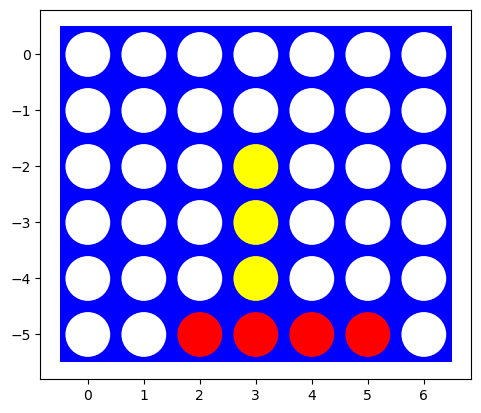

In [7]:
shape = (6,7)
board = empty_board(shape)
my_search1 = cutoff_search_class(board, 9)
my_search2 = cutoff_search_class(board, 9)
board = my_search1.play(board, my_search1.cutoff_minmax_player_100, my_search2.cutoff_minmax_player_100, 9)
visualize(board)